In [2]:
#import models and libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#import dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


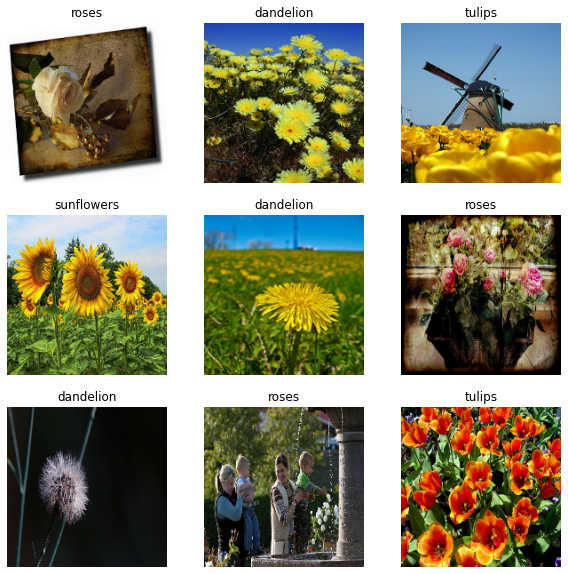

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        4

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 65s 656ms/step - loss: 1.3000 - accuracy: 0.4373 - val_loss: 1.0946 - val_accuracy: 0.5477
Epoch 2/10
92/92 [==============================] - 59s 639ms/step - loss: 1.0279 - accuracy: 0.5862 - val_loss: 1.0181 - val_accuracy: 0.5722
Epoch 3/10
92/92 [==============================] - 59s 638ms/step - loss: 0.8963 - accuracy: 0.6540 - val_loss: 0.9675 - val_accuracy: 0.6104
Epoch 4/10
92/92 [==============================] - 59s 637ms/step - loss: 0.7263 - accuracy: 0.7343 - val_loss: 0.9667 - val_accuracy: 0.6199
Epoch 5/10
92/92 [==============================] - 61s 658ms/step - loss: 0.5667 - accuracy: 0.7953 - val_loss: 0.9513 - val_accuracy: 0.6403
Epoch 6/10
92/92 [==============================] - 59s 640ms/step - loss: 0.3896 - accuracy: 0.8631 - val_loss: 1.0574 - val_accuracy: 0.6281
Epoch 7/10
92/92 [==============================] - 61s 660ms/step - loss: 0.2592 - accuracy: 0.9142 - val_loss: 1.1591 - val_accuracy: 0.6281

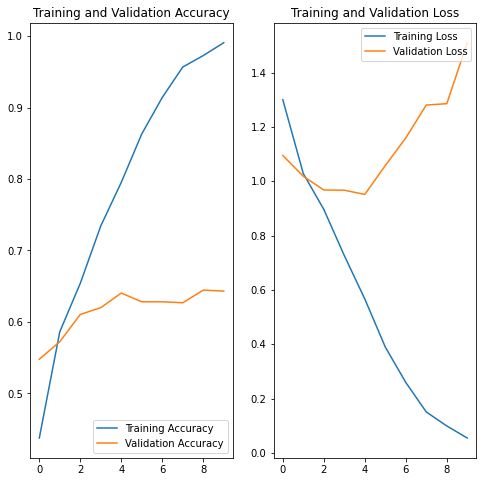

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

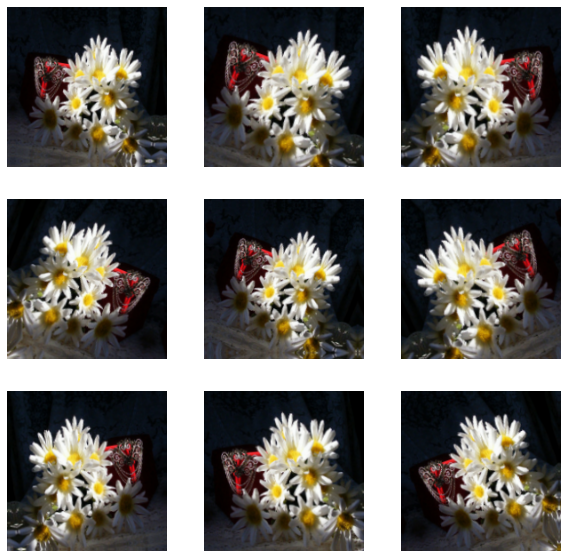

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [25]:
flower_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhIVFhUXFRUXFRcXFhUVFRcXFRUWFhUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAAAQIDBAUGB//EAEAQAAEDAgMEBwYEBQQBBQAAAAEAAgMEERIhMQVBUWEGIjJxgZGhE0JSscHRYnKS8BQjgrLhosLS8QcVJDNTc//EABsBAAIDAQEBAAAAAAAAAAAAAAAEAQIDBQYH/8QAMhEAAgECBAIJAwQDAQAAAAAAAAECAxEEITFBElEFE2FxgZGhscEiMvAUktHxI0LhBv/aAAwDAQACEQMRAD8A6hoSEJ6QKrLBayUFKkLEALiTgmBikQAJUiVAAlSJUACVCCbIAVMfLwzVR1Zdwa0E8eSuRsQAxsRObvLcpg22iUJbIJGpUqVBAiVASoAAlQEIAAEWSoQAISpUAIgBOASEoAEJEIAzkt01oT0ACUJLpQgBUqRJiQA5KkSoAUBKEiRzrZoAeE14TI5C7dZSgIAbHEG6BSBASoAE2V4aC5xAAFySbAAbydyq7V2nFTRmSV1huAzc4/C0byvM9u9I5at1h1IgeqwH1cfePoPU51Kqgh3BYCpipZZLd/xzZ2tR0whDsLQ5wuAXaC18yAc/kthu04S3H7aPDa9y4Dzucl5Q3JL7Q8SlY4mS1PQVegaDjFQbi1q9b+yXgl3HpTek9Niw+0zva9jh89fHRa8bgQCCCDmCMwe4rx/EF1vQnbXWFO85Ov7M89SO42Pj3q9LENytIUx/QkaNHrKLba1Ttpu1ZL57M8n21kJUqbPOghCVACJwCLJUACVIkAQA5CVCAMkJU26a6UIAkummUDeoXsLt9gpGwNG66CSRrr6JzQhKggVNkksE5Vapt8hqUEkP8e29hmVfaCdVDS0bWaDPirKAHBKkSoIFCEBRVkgZG95yDWucfAEoB32POumdX7eewN2su1vA2PWd4nLuAWPFEAlfLbI8VXkmyK5MpOTuz6LQoU8PTVOOiVu/+3mOqJgFW9sqss10mA71PCUdW7yzLbKvh4q3s3aPs5GPGrSD+l2K3joslsea0Kd+WaHloTFymmpfiPS63pnCzKNrn5X1Abnuucz5Kq3p2Mv5B1z64032yzPkuC9qpopweX74rV4mpsIU+hMFFJNN9rb+Gl6HsFBWsmYHsdcHzB4OG4qyvKqGvkgdiY4jjwtwI3hdfsPpfHKcMton7jfqHlc9k8j5piliFLJ5P3OLj+hquHvKn9UfVd63714pZnT2SoQmDigEoULmHcpmoALISoQTc5vE5/IepViKIBOaE5ADghIEqCBUoSApCUAOJQxtkjU5ADglTU4IAq7S2jHTsxyGw0AGZceAC5mu6fxtH8uF7z+IsaB5YrrO6d1+OcRg5MFj3nrH0wrkKhJ1MRJTtE9HguiKM6EalW93nbRW29M79ttjV2r08q3k4XiJvBjQD4udc+VllUe36uWQMdUyOaQS4F5LS0agjgsqrcnbMmw+0dyaD63+QUttwbCFGjHERjZJJ38s/g2KiZVS4nRWYoOqHEdZ3pySFobmldD0D4pZtjaWjAN3OxO9FckwAZgLMm2hnkqU1Y4atc3vV1CUhd4uhRi1H87zQc8X4Ic46DPuzVShZju53YH+o8FbdVluQyHBDjZ2CnW44cbyT0/OQ0yEZEEd+SljmurIe2UWcBfcd6qT02A5G4VcmbWnHO90asEt25pxYCq9FJcJ97GypYaTyOy6G7fc17YJXXY7sE6t0wi/A6W+i71eWdE2YqqIH4mu8sx8l6oE/hm3F3PHdOUadPEJwVuJXfm1f0z56glCEqYOKCEIQBhpUgQSgByQusqpqbmzR47lIyO+ZKCSZrie5PATQvOemXSyX2r4IThYw4XOGT3Edrre6L5ZcOaiUkka0aMqsuFHpCcvFNidJpqVxcwgh1sTTmHW0PG+ua7/AGJ07gms2QeydxJvH57vHzVFUT1yNqmDnH7fqXZr5HW3UVXUtiY6R/ZY0uPcBfLmpAVxfTvbgwup2n/9DzGYb9SrydlcWpwU5JPTfu39Dj5ah0j3SO7TiXHvcbqvVlSU7crplc1cvc98klTy0sYdU9TbKj3+Q/KqlYtjZ8NgL9rCmqjtA4mEpurim3saDZOqbrIq6lWKuaypMhxgyHsNyH43/D3LGnFas6OMrSb6unr8c/AubGhuHvcOsLYfUn6KjXS4nez4reBDYZOTHLB2fHclx1d6NVoNNubMsRTcYU8PHe7b9/F6GlYNaGjcPUqs9K6Qn8KfBDfMud5geqra2bNW1O0YrLyIo5CDktKGQu1VCoaWkW0PHNT0lQAc1EldXRehPgm4SdiSOTC495+attkvmqNURiJGhz89VapB1b8foqNbjVOTu4m/0WmDKmJzjYBwB/qJH1XrYC8SgcvTOhu2DPGWO7cYGfxN3eItY+HFMYaaT4eZxOn8JKUVXjosn3Xyfw/A6JCEqdPLAhCEAc+XWTHOxaIDeKeEEgxllUm2xTscWvnia4agvaCORF1k9LOkQpmFjDeZwy/AD7x58AvKpn6km5JuScyTxJWc6lnZDuHwbqR45ZLbtPZmdIaUmwni/Vb1OS8h29P7SomeNHPeR3FxsfJZpJOgUjPafbEqSbeo1h6EKbfDd37P6IXhEM1jYq1HBi1AYfzdX9KhqdmvbmMJ7iMX6VClF5Nms6FaK6ynFtd3w8/Q9D6O9L2xUnszf2rAQy+YNyTr+G+nC1lxu06wucc9bklZ9JLiZbeM/LtKB8pJzUpPR7GMlTTVWOks/Hc6LYj8UeH4T6OzH1Ute3JZmxZ7F/cFsvcHBJ1FabPT4OfWYaPl5ZexyNYfkuhlfqRoSszaVPbMJtBP1cG8erVvNccE1scrDSeHxE6cv9ll4X97+gtRIXEN+I2/UbLT24MDGhuQZht/SsSSfC8P4OB/SVu9JB/LJHH5lVkrSgjShU46OIlfNL0s7fIRye1ppMO9um8WzLVmDKPL3nNH9Pa+ybsWq9lICew7qPV6tojEMNiWtLnBwzFjpdDXBLhLxqPEUVVf3JcL8d7cmm/KxXvfVXaFmeotv13LNjlbxUskhIwNB63ady4NUSi9C1KrFfVq+zfyEkfiZcdnG63cdFGCrFVDhAFxfeFBFESbBWTVrmU4z47NZ5exew4gFoQjIAblWnZhDR3qeiS0jsUopN31LUBBNt66roGHfxJtp7N9+7K3rZcjGLO9F6x0V2P/AA8VyP5j7E8gNG+G/mVpRg5TT5CPS+JjSwsovWWS+X4L1stzcQhC6R4gEJUIA5sKOpnDGuedGtLj3AXT7qvtClEsT4nEgPaWkjUX4IZKtueRbRqnSPdI43JcSe8rLa0vOHd7yu7XpnQyPhcblrrX3HgfEEFDIsDfmkvsXaeoSWIeX2pemy8iIEXa0dlOqRb3VXpZOsX8Pm5OOJ2eTW/E7/b8Sm1mRCqpQdldt5W5LLyKtRMURbRdocx6qSSmadTJ4R/dyjpGWkaBnc2PjyWy4OFnOksTGqs7XaWqevYmWJjmJmZj3vv91BWxWIcOyez/AMVIAYZMO49n7KSpZ1DbTtYfhdv+aqnZr8yN5wc4Tvk1quUluuyS9c8xmzH9bvWzFJYrnqEXx9yt0m0d0n6v+SpWptyy2GOjsbCnTUZu127PbX8/NdmtjDgufqKfDnvXTsaC1Y9fEsaM7Ow/0lh1Uhx2zMlxLyG++Tbvuum6Qj+Vb8QHzWVsSIe2z1DSW/vuK29qtvC/lY+q0qzXHFcvkVwGHl+kqzeslb9qfrdv0Oc2a3GTH8Wn5tyv0m05mdU5gdWxWNiLHBw3Zrd2nHfDUM0LW4/+X0V6qV89H7i2BnPqm4NqUHnbeL/h+hFNVxntRhp5dVyc2tOkbQ38Wp9VZp3NlHPgnGGyX4ksmjrxpVJ/XGas90kn5lAQnffvK19mwANxFVGNJNgtCODK27gonK5thaCg7oqTuLnX8lcohbVP9mLKs+YA4R4/ZU1GuFRzbJmOJvkvXOiO1P4inafeb1H8yAOt4i3jdeTQZr0z/wAf0+GnL/jeSO4AAfMrfDN8ZxunacXheJ6qSt45NeK9jqEICVPnjwQhCAOVuke8AEnQC58E26DnkdDqoJPGtrVpnqDKfekBtwAyaPIBSVebVZ6U7CNI8EPDsWbciHAA6H78iqhdiCTqp3TPU4GcZU5Rjvp3afBjh5a63FbcTesLdbAy55tv1MB93Lrc1kTwuBuFPS1+AHI/PyWlSPEroWwdRUJuNV2X48ttee2W7NSqAtcdlZez7Gob3P8A7HIZXB2IcTiH+5GyIy55fuH7KpGLhGVxiriI4ivS6vP6r/td3+cmTbUjuLjUdYKtPN1O8fv5q1tB+SzqWnLy3gMu9Wp24LvYwxspde4U1dyVvW3sWNlQEDEd/wAlC2LXvNu5azpABYdY/wBv+VSgjucH9QQpt3ZaeEhCMKUc2r+bJNn1zosiMTOG8fl+y0urKLsN+LfeHgqRplA6Eg3abOG8LNqM3dZMcpzq0IqElxR5b+D+GErXRvDm7iugoqhszDbfk5vwrElrLi0jM/ibv7wpthnDMbHIsPzCiavG71RbDVFTr8MHeMnmt0/Huz2KG1KXA8hbXR04oAD7rnN8D1h/cpNqUwfms2gl9i837D8jy4FDl1lO24QofpcX1v8ArK67r5+WRJUbOMbrs03cvwlPEptmy5/MVqscHDIhzVWmpRuWXHfUe/Sqnd03ZPbK3hkQw1Y+AjuzV2KoB3HyH3VaOkN1cEYaLnRVdtjenxpfU/YrbRqSLNGWWfFUYG5p9U3EblNhYbqytYXlxOpmbETMl6p0IP8A7KP+r+5y8tpss+a9i2HSmKCJvBgv3nM+pK2wq+t9xzf/AEE0sPCO7lfyTv7l66VNTk8eSBCLIQBx4ci6p0cuWE6ty8NysXVE7q5pODjJxZxH/kLOVg4MHqX/AGXGtc5vZ04Lu+nUHYktlYtJ56gevouNljS8naTTO/hqfFhoSg80n7kBqgdWu/pIVd8jPhf6J0LesR+FPZFfVWyiU4qlVZ2eqzS2KYY1xsL5+C3MTYm4R7p8yqrYgM/dUX8MScTs+GL/AIqJtT1eSNMPTnh7uMU5PfZL13zDDjzOTf7lHUVPusy57z/hSzAuyJ+gULIuspjbVmNXi+2G+r3f8fmpbpIcsk6ocI5YidCc/wAp6pPqkfOI231J7Lef2CyZJC44nG5/eQUQg5O70NcRiYUKcacF9SafYrO/ry5evWysGg/fNQSwLL2VXW/lk5e7y/CtdlRxS04Sg7HZw+Jp4iHEvLkUJYc03CW5jIrUZGDmmyU2SFUCWDTu0U6eveBnY+iZPU3PY9VJDTqY0vJTxQvoZxp13C3F52fuUGMcDcEh3L7KdldNfNzXd7fsrsdNcIkgAz4ao6xPVFo4WUM4ya8X/RajrmloNrHeM/mieTE23NObGO4KOQcFkPpNLN3KL2W0UkKsGJTU2znynBGwuJ0AzP8Agc1N9jNpRu9i7suD2j2sGZc4AW5usvaAuV6EdG/4dgklb/ON8iQcAuRlbK5G/nbiurT2HpuCbe55LpjHQxNSMYaRvnzbte3Zku/u1LJU0uUZkTBxyZCr+05oQBwZOF1929W7qKdmSSJ+SwpvYexUdJeAzaNG2ZhjfodDvBGhC892hROie5jvi8+BHIr0OpqAxpc7QevJcHtWpdI8vIuHa93AKtaN1fcZ6LxPVycZfa/R8+7n/wAOcqYyDcK1TyB+Wjv3opZWg9yqGn4LPiUlZnTdOVKpxQzT1X8FvBxQTdQNc7Q5pzSdVXhN1VWyH+xUM8rI8jiLj5DxU7qk2NyAFjTHE4u/dlenHieYrja8aUV1a+p89lvkLUzYze1gNFa2Ps/2zyCbBoufoFSiiLnBo1K6ump208TjyzdvdnkFpVmoR4VrsK9H4V4ms6tX7I5yvvlp4ZX5LLcfKWxtwgAN4ZrEhqS44AHOdfLD9eCGMfO7Pj2fdVirqBGMEO7tFuh8fosIx4ctWdStiJVUqi+mCy0zl2JaL45FynDhu9VcaFz0NY46jP8A1LT2dtQHI+aznSksxrDY2jO0b66XL7YgEpITK+rEbQ+zi29urbK+hz7ln/8AqsbtMZP5VVQk1dIYqYmlTlwykk+Rfa7LxPzSyEAZm374Jdlwl+uXd91sN6ORv3EHiPrxWqovdiEulIJ2im+3/n9GIJr24DT98VapmYrAC5OQAzN+Flt0vRAE5vNr7rXXbdHdhRQ5taLjIEi7r7zc71EaEm7Mir0xSpx4km+zT3MHYvQYus+c4W/AO2e/c31PcuyoNmQwC0UbWZWJA6x/M45nxVslQySp2FKMNEeXxWOr4l/5JZclkvL+bvtHyTAKuHPeeDfUoc8a6k6KRgc4fCOeZWgoJPIW5Mbidw08SVQkoql9j7RrDfQC4tzWvFGG/U71Igm5lfwEv/2/6QhatkIsFzhpLEWVW9j6KUG6iI4pROzudiUFKLRhbdqcTsA0br3/AOFUgpQU+sp8Ejr31uN+qdDn7pV27mVOHCrEFVshrtwvyWRUbFkb2cx5FdZC4t93L970+Qh2gseCzaGo1JLJHEspDphIPMJktG7uXVyx4ToqlVGCLhCSRepiKklbRdhydXT5LOcFv1zFhytstkJTu82Xtgw3cXflCudIps2xjQdZ3fuVLo/VBktnaPy8dy0OkcfXa7QW/fzWEk1Wz8PI69Bp9GtQ1vZ/u+VYjoJLGwPZhkeeb3XDT+mySBt8gFRpasMmOIZHqm+9hGGyvwse0EN6zrjBwc3nwKrOLTz7DfDV41I2Wza7bKyWWuaXixa6FrLOcC25w4mgWH5rlVZIwCHDQ3B/M3f4tI8nK7tuqBp7ZXe8tbb8Dz1xy6qrRG7Dywu/2/VEbqN33BX4HWcI8lLxz+F6khcXxvj1JHV72kOFvK3in7I2dvOql2dCHHNbuzo758SphLVC+NpfZN65rwWfz69hY2bS20/fgui2fGd4sq9FT2FytmjZYLZHMm7FqFmgW0whjRc2tr3rJpr3uBe27cr0dDiOKQk8t3ktILcRxMs0hs08riBGzLe46AchvU0ezxq5znd+nkrgCctBcZHEG6CykTSU5BAJUiVAAhCEAeYNqlZY+6pwwKe1km0dxSLE8QcL2z+agbSbxl8lKw33q3CzJQGxnvBGR89yikj3hbZgBVGWkINgcuakqZ5biHNZlTFbuW6YcJxDXeOI3qtVw3zGhUhc43aEJXPVLbFdvW0pGW5YVRR6q0WUeZhQR3P9JXQ0UzZWhkh6w0v7/C3NZ7YcJvZTiEOyWdV3On0bkmo5vdPfkSVmzOVwq0FDlcMfh+G7sP6RmrUTZBk15w8+t/coZzJbOV9uAdhHk1Zxk9Lj06VK/G6b9PfX0Kte04hi7Q3bmt4Dgrez4S42G4FVY41ubLoXmGQtAxOBDbm3VyzCvfRCWcOKrbXxz0XfzfYipRS5kAcsX2XT7Obouf2ZRlps4EHgV1mx4wpSSMK1SU7ORuUMS0YW5KvSDJaez4cRz0GZ8FqhGpJJNsv0EGFuepz+ytpEqYSsrHKbbd2ASpEqCACVIlQAJUgSoAEIQgDziMJXMJKjp3ZKcHelTrpsQNUsU1k5se9JJGoLXLkUqmw3WezLu+StNfkosBHKwHcqD4sJ5HXlzWhiTGsvkfBSRsY1fBfJZFTRcM10skOE2Om77KtUU3JSCOQmpN6rteWgttkV0NZDZY08eahpM1p1JQleLzGQgWyOe/ioaqEFS+zPBPNJmCsuqs7pnTXSblDhlDP0/PMTZtBidd1rcOK7GmphYcOCyNnQ2C6GkClIUrVnN/AwUIORCmp6ItOmR9CrcUeautb+/FXSFpSIaUZW7lv0Edm34/LcsqCO77Def+1ugWW1NZ3EMTPJR5j0IuhbCQJQkSoAVCEIAVCEIALpEqEAeZx6KxDoq0YUzTuSp1Ui212ie43UULFM1qgtcUMukjNsvJPCWWPJANiON0xx0KdAL5FEkNkAiR0eIcVnzNwmx03K4x1svP8AfBMqWhwz1UJk2MqqiusispCMwtR77ZH/ALTMF1NwWRjQsCtCBTvpAc9Dx+6BGRa6C+pYpmaBbFLGLLNpwMltU4G5QDkTxtVk6JsIUkrMskaFZO5b2U293cMvPX5LTVLZTbMvxJ+yupqGhy6zvNglBSJVYyBKkQgBwQgIQAqEiVAAhCEAeYMU7UISux1Ny0xSBCFBYkUzdEIQSVx2vD6q1J2T3JUKCCrw7lFU6BKhVNDIrOyO8KOJKhW2BkidJ2UIQwQyn1W5R/RKhREmoX6VTS9lIhSV3NTZ3/xt7vqVZQhNx0Ryan3vvYJQhCkoKgIQgBUIQgASoQgAQhCAP//Z"
sunflower_path = tf.keras.utils.get_file(origin=flower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to roses with a 94.48 percent confidence.
